**Métodos computacionales 2**

**Universidad de los Andes**


In [1]:
import time
import numpy as np
import scipy as sci
import scipy.integrate as integrate

import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('dark_background')

In [2]:
from matplotlib import rc
rc("animation", html = "jshtml")

## Pendulo doble

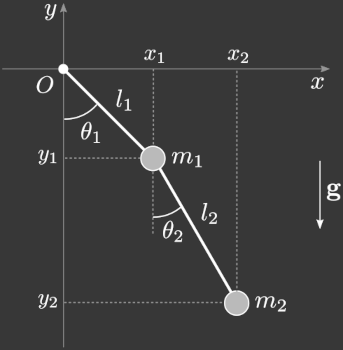

De acuerdo al diagrama anterior, la posición de la masa $m_1$ y la masa $m_2$ se puede escribir como
\begin{align}
x_1 &= l_1 \sin\theta_1 \,\\
y_1 &= -l_1 \cos\theta_1 \,\\
x_2 &= x_1 + l_2 \sin \theta_2 \,\\
y_2 &= y_1 - l_2 \cos \theta_2 \,\\
\end{align}

Derivando con respecto al tiempo obtenemos: 

\begin{align}
\dot x_1 &= \dot\theta_1 l_1 \cos \theta_1\\
\dot y_1 &= \dot \theta_1 l_1 \sin \theta_1\\
\dot x_2 &= \dot x_1 + \dot\theta_2 l_2 \cos \theta_2\\
\dot y_2 &= \dot y_1 + \dot\theta_2 l_2 \sin \theta_2\\
\end{align}

Y derivando una segunda vez:

\begin{align}
\ddot x_1 &= -\dot \theta_1^2 l_1 \sin \theta_1 + \ddot\theta_1 l_1 \cos \theta_1\\
\ddot y_1 &= \dot\theta_1^2 l_1 \cos \theta_1 + \ddot\theta_1 l_1 \sin \theta_1\\  	
\ddot x_2 &= \ddot x_1 - \dot\theta_2^2 l_2 \sin \theta_2 + \ddot\theta_2 l_2 \cos \theta_2 \\
\ddot y_2 &= \ddot y_1 + \dot\theta_2^2 l_2 \cos \theta_2 + \ddot\theta_2 l_2 \sin \theta_2\\
\end{align}

### Fuerzas sobre cada masa

Las fuerzas sobre la masa $1$ en cada eje son:

\begin{align}
m_1 \ddot x_1 &= -T_1 \sin \theta_1 + T_2 \sin \theta_2\\ 	
m_1 \ddot y_1 &= T_1 \cos \theta_1 - T_2 \cos \theta_2 - m_1 g\\ 	
\end{align}

Las fuerzas sobre la masa $2$ en cada eje son:

\begin{align}
m_2 \ddot x_2 &= -T_2 \sin \theta_2\\	                                                
m_2 \ddot y_2 &= T_2 \cos \theta_2 - m_2 g\\
\end{align}


### Ecuaciones de movimiento

A partir de las ecuaciones de segunda derivada de la posición y las ecuaciones de fuerza se obtienen las siguientes ecuaciones de movimiento

\begin{equation}
\ddot\theta_1 =  
\frac {-g (2m_1+m_2)\sin\theta_1 
-m_2g \sin(\theta_1-2\theta_2) 
-2\sin(\theta_1 
-\theta_2)m_2(\dot\theta_2^2 l_2 
+\dot\theta_1^2 l_1\cos(\theta_1-\theta_2))} 
{l_1(2m_1+m_2-m_2\cos(2\theta_1 
-2\theta_2))}
\end{equation} 

\begin{equation}
\ddot\theta_2 = 
\frac {2 \sin(\theta_1 
- \theta_2) (\dot\theta_1^2 l_1 (m_1 + m_2) 
+ g(m_1 + m_2) \cos \theta_1 + \dot\theta_2^2 l_2 m_2 \cos(\theta_1 - \theta_2)) } {
l_2 (2 m_1 + m_2 - m_2 \cos(2 \theta_1 - 2 \theta_2))}
\end{equation}

estasecuaciones diferenciales de segundo orden se pueden comvertir en ecuaciones de primer orden nombrando a la velocidad angular $\dot \theta = \omega$:

\begin{equation}
\dot \theta_1 = \omega_1
\end{equation}

\begin{equation}
\dot \theta_2 = \omega_2
\end{equation}

\begin{equation}
\dot\omega_1 =  
\frac {-g (2m_1+m_2)\sin\theta_1 
-m_2g \sin(\theta_1-2\theta_2) 
-2\sin(\theta_1 
-\theta_2)m_2(\omega_2^2 l_2 
+\omega_1^2 l_1\cos(\theta_1-\theta_2))} 
{l_1(2m_1+m_2-m_2\cos(2\theta_1 
-2\theta_2))}
\end{equation}

\begin{equation}
\dot\omega_2 = 
\frac {2 \sin(\theta_1 
- \theta_2) (\omega_1^2 l_1 (m_1 + m_2) 
+ g(m_1 + m_2) \cos \theta_1 + \omega_2^2 l_2 m_2 \cos(\theta_1 - \theta_2)) } {
l_2 (2 m_1 + m_2 - m_2 \cos(2 \theta_1 - 2 \theta_2))}
\end{equation}

### Parámetros y condiciones iniciales

In [3]:
#parámetros
g = 9.8 # m/s^2
l1 = 1 # m
l2 = 1 # m
m1 = 10 # kg
m2 = 10 # kg

tiempo = 20 # s
puntos = int(tiempo*200) # numero de puntos a evaluar en la trayectoria

# condiciones iniciales
theta1 = 130 * np.pi/180 # angulo inicial respecto a la vertical (rad)
theta2 = 110 * np.pi/180 # ángulo inicial azimut (rad)
omega1 = 0.0 # velocidad angular inicial respecto a la vertical (rad/s)
omega2 = 0.0 # velocidad angular inicial azimut (rad/s)


### Ecuaciones diferenciales

In [4]:
def numerador_d_omega_dt_1(w, g, l1, l2, m1, m2):
  theta1, theta2, omega1, omega2 = w
  p1 = -g * (2 * m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 -2 * theta2)
  p2 = -2 * np.sin(theta1 - theta2) * m2
  p3 = omega2**2 * l2 + omega1**2 * l1 * np.cos(theta1 - theta2)
  return p1 + (p2 * p3)

def numerador_d_omega_dt_2(w, g, l1, l2, m1, m2):
  theta1, theta2, omega1, omega2 = w
  p1 = 2 * np.sin(theta1 - theta2)
  p2 = omega1**2 * l1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta1)
  p3 = omega2**2 * l2 * m2 * np.cos(theta1 - theta2)
  return p1 * (p2 + p3)

def pendulo_doble(t, w, g, l1, l2, m1, m2):
  theta1, theta2, omega1, omega2 = w
  d_theta1_dt = omega1
  d_theta2_dt = omega2
  denomin = 2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)
  d_omega1_dt = numerador_d_omega_dt_1(w, g, l1, l2, m1, m2) / (l1 * denomin)
  d_omega2_dt = numerador_d_omega_dt_2(w, g, l1, l2, m1, m2) / (l2 * denomin)
  return [d_theta1_dt, d_theta2_dt, d_omega1_dt, d_omega2_dt]

### Solucionar ecuaciones

In [5]:
def solucion_ecuaciones(cond_ini, g, l1, l2, m1, m2, time, puntos):
  t = np.linspace(0, time, puntos)
  sol = integrate.solve_ivp(pendulo_doble, [0, time], cond_init, "DOP853", t, args = args )
  return sol

In [6]:
def solucion_ecuaciones(cond_ini, g, l1, l2, m1, m2, time, puntos):
  t = np.linspace(0, time, puntos)
  args = (g, l1, l2, m1, m2)
  sol = integrate.solve_ivp(pendulo_doble,[0,time],cond_ini,'DOP853',t,args=args)
  return sol

def polares_a_catesianas(soluciones, l1, l2):
  x1 = l1 * np.sin(soluciones[0,:])
  y1 = - l1 * np.cos(soluciones[0,:])
  x2 = x1 + l2 * np.sin(soluciones[1,:])
  y2 = y1 - l2 * np.cos(soluciones[1,:])
  return np.array([x1, y1, x2, y2])

cond_ini = np.array([theta1, theta2, omega1, omega2])
sol = solucion_ecuaciones(cond_ini, g, l1, l2, m1, m2, tiempo, puntos)
data = polares_a_catesianas(sol.y, l1, l2)

### Mostrar solución

IndexError: index 1 is out of bounds for axis 0 with size 1

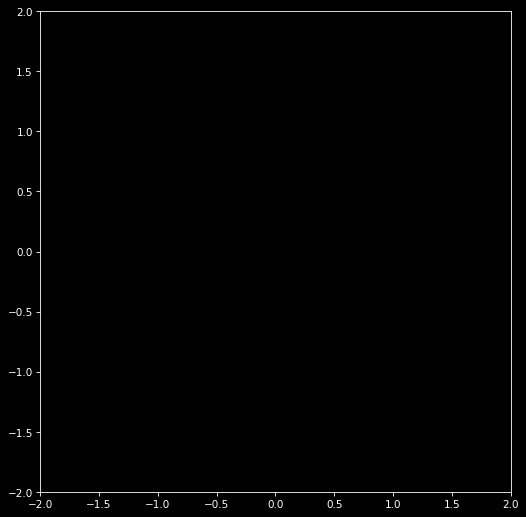

In [7]:
fps = 24 # fotogramas por segundo

def update(num_frame,d,elements,paso):
  j = num_frame * paso
  masa1, masa2, brazo1, brazo2, trayectoria2 = elements
  trayectoria2.set_data(d[2:4, :j+1])
  masa1.set_offsets(d[0:2, j:j+1].T)
  masa2.set_offsets(d[2:4, j:j+1].T)
  brazo1.set_data([0, d[0, j]], [0, d[1, j]])
  brazo2.set_data([d[0, j], d[2, j]], [d[1, j], d[3, j]])

def inicializar_elementos_graficos(d,m1,m2,ax):
  masa1 = ax.scatter(d[0, :1], d[1, :1] ,s=80,c='#ff3030')
  masa2 = ax.scatter(d[2, :1], d[3, :1] ,s=80*m2/m1,c='#ff3030')
  brazo1, = ax.plot([0, d[0, 0]], [0, d[1, 0]],c='#ff3030',lw=3)
  brazo2, = ax.plot([d[0, 0],d[2, 0]],[d[1, 0],d[3, 0]],c='#ff3030',lw=3)
  trayectoria2, = ax.plot(d[2, :1], d[3, :1],c='#34abeb',zorder=-1)
  return masa1, masa2, brazo1, brazo2, trayectoria2

def ajustar_ejes_coordenados(l1,l2):
  fig = plt.figure(figsize = (7,7), dpi = 75)
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1) #margen
  ax = fig.gca()
  plt.tight_layout()
  plt.xlim([-l1 - l2, l1 + l2])
  plt.ylim([-l1 - l2, l1 + l2])
  return fig, ax

def crear_animacion(data, l1, l2, m1, m2, time, fps, name):
  N = time*fps
  paso = int(np.floor(data.shape[1] / N))
  if paso<1: raise ValueError('Escoje puntos > '+ str(N))
  fig, ax = ajustar_ejes_coordenados(l1,l2)
  elements = inicializar_elementos_graficos(data,m1,m2,ax)
  ani = animation.FuncAnimation(fig,update,N,fargs=(data,elements,paso))
  return ani
  #ani.save(name,fps=fps)
  #plt.close(fig)

start_time = time.time()
crear_animacion(data[::4],l1,l2,m1,m2,tiempo,fps,'pendulo_doble.gif')
#print("Tiempo usado en crear la animación (s):",time.time() - start_time)

In [ ]:
print("Tiempo usado en crear la animación (s):",time.time() - start_time)

Tiempo usado en crear la animación (s): 41.99021816253662


In [ ]:
# Mostrar video
from IPython.display import HTML
from base64 import b64encode

name = 'pendulo_doble.gif'
mp4 = open(name,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=525 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

FileNotFoundError: ignored

**Referencias**

Profesores: Diego Alberto Castro, Metodos Computacionales Uniandes